# Project 3: Communicating data findings


## Dataset: Student Performance in Exams
This dataset is about student performance, where it lists the students' grades in 3 subjects, as well as information about the student, like their gender and ethnicity. 

The dataset contains 8 columns:
* `gender`: a categorical variable (male or female)
* `race/ethnicity`: a categorical variable, taking one of five values: `group A, group B...group E` 
* `parental level of education`: categorical variable, which can be `high school, college, bachelor's, master's or associate degress`
* `lunch`: a categorical variable, which tells the type of lunch the students have. This reflects their financial status. It can be `standard` or `free\reduced`
* `test preparation course`: indicates whether a student completed such course. The values can be either `completed` or `none`
* The rest of the columns are numeric, indicating the studen't's score, out of 100, in `math`, `reading` and `writing`

The dataset has **1000 records**, but we will see if that number changes after some wrangling

## Research Questions: (TODO)


In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [45]:
df = pd.read_csv("dataset/StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Data wrangling
In this step, I will perform the following:
* checking the column names are "code friendly"
* checking for nulls in the data
* checking if there are duplicate rows
* checking if the datatypes are the most suitable for each column

This process is iterative, so I might need to do some data wrangling later

#### Code friendly colum names
From the dataframe head, we can see that the column names are meaningful, but can sometimes be long or contain whitespace, which are not code friendly. As such, I will try to rename them

In [46]:
# replace column names with values in the dictionary
df_mod = df.rename(columns={
    "race/ethnicity":"race",
    "parental level of education": "parent_education",
    "test preparation course": "prep_course"
})

# replace whitespace with underscore
df_mod.rename(columns= lambda x: x.replace(" ", "_"), inplace = True)

df_mod.head()

,gender,race,parent_education,lunch,prep_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Nulls, and datatypes
This can be easily checked by the `info()` method of the datafram

In [47]:
df_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            1000 non-null   object
 1   race              1000 non-null   object
 2   parent_education  1000 non-null   object
 3   lunch             1000 non-null   object
 4   prep_course       1000 non-null   object
 5   math_score        1000 non-null   int64 
 6   reading_score     1000 non-null   int64 
 7   writing_score     1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


So, 
* the data has no null values,
* The test scores are integers, and the categorical data is of type string

So far so good. **However**, for ordinal data, like parent_education. It will be useful to sort ordinal data while visualizing. We can do that via the `pd.api.CategoricalDatatype()` function to create an ordinal datatype, and convert the dataframe column to that datatype

###### Ordinal Datatype

In [48]:
# create a list of sorted data
sorted_edu_levels = ["some high school", "high school", "some college", "associate's degree",
                     "bachelor's degree", "master's degree"]
# create the oridnal datatype
parent_education_ordinal = pd.api.types.CategoricalDtype(categories=sorted_edu_levels,
                                                        ordered = True)
# cast to this new type
df_mod["parent_education"] = df_mod["parent_education"].astype(parent_education_ordinal)

The rest of the ordinal columns, like lunch or prep course, are binary anyways, so we do not need to convert them

#### Duplicated rows

In [49]:
print("Are there any duplicated rows?")
df.duplicated().any()

Are there any duplicated rows?


False

That's it for data wrangling, unless something else comes up later

## Exploratory data analysis

### Univariate analysis
Let's see how each feature is distributed

#### Gender

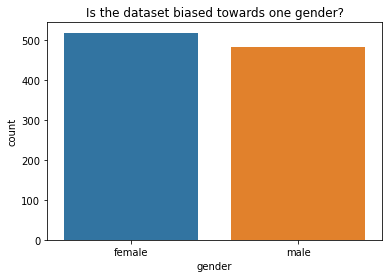

In [50]:
sb.countplot(data = df_mod, x = "gender");
plt.title("Is the dataset biased towards one gender?");

The margin between the 2 gender count is not wide, sow we can assume they are equally represented.

#### race

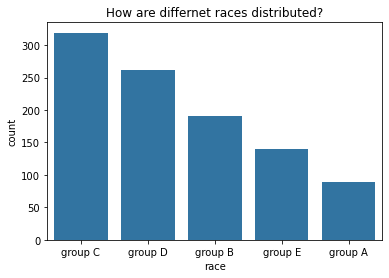

In [51]:
# value_counts() for sorted bars (polished visual)
race_counts = df_mod.race.value_counts()
# unify the color
base_color = sb.color_palette()[0]
# plot
sb.countplot(data = df_mod, x = "race", color = base_color, order=race_counts.index);
plt.title("How are differnet races distributed?");

So, different race groups are not equally represented. We will need to keep that in mind if we will take into consideration the race/ethinicity in further analysis

#### Parents level of education

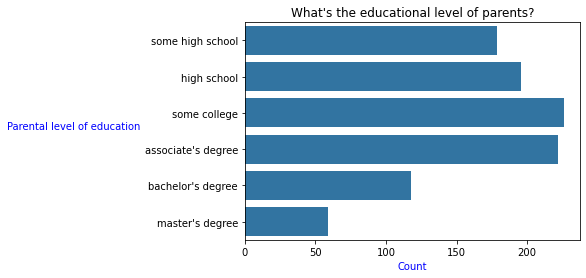

In [65]:
# value_counts() for sorted bars (polished visual)
edu_level_count = df_mod.parent_education.value_counts()
# unify the color
base_color = sb.color_palette()[0]
# plot
sb.countplot(data = df_mod, y = "parent_education", color = base_color);
plt.title("What's the educational level of parents?");
plt.ylabel("Parental level of education", ha = "right", rotation = 0, color = "blue");
plt.xlabel("Count", color = "blue");

We can see that the majority of parents have associate's degrees or less, while fewer have bachelor's degree, and even fewer have a master's degree

#### Lunch

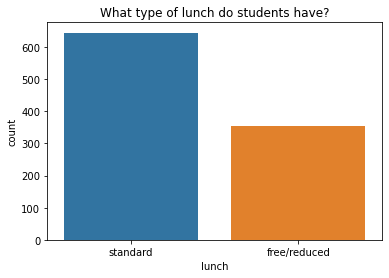

In [68]:
sb.countplot(data = df_mod, x = "lunch");
plt.title("What type of lunch do students have?");

We can see that the majority of students enjoy `standard` lunch, wheras the rest have `free` lunch, which may indicate a poor financial situation.

In [69]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Taking Test Preparation Course

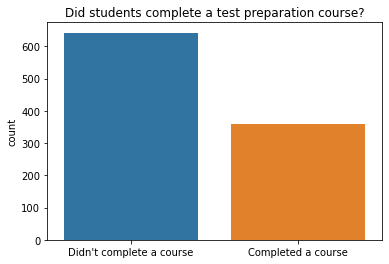

In [100]:
sb.countplot(data = df_mod, x = "prep_course");
plt.title("Did students complete a test preparation course?");
plt.xlabel("");
plt.xticks(ticks = [0, 1], labels=["Didn't complete a course","Completed a course"]);

As we can see, the majority of students didn't complete a test preparation course

#### Math, reading and writing scores
Becuase score is an integer between [0 and 100], we can plot a histogram with binsize = 1. Or, to make the trend more visible, we can group the score into bins of 5

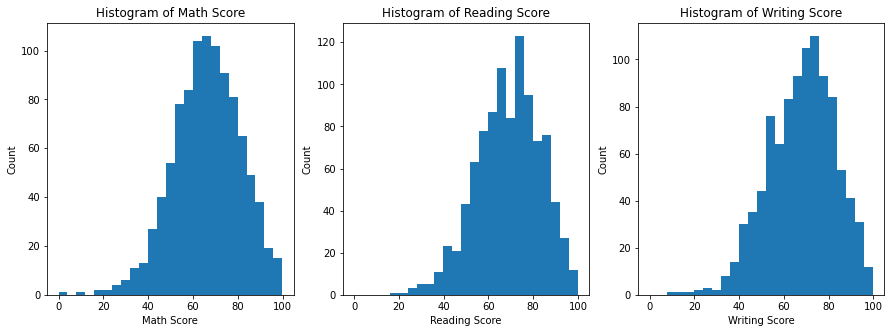

In [116]:
# bins of size 5 and include the range [0 -> 100]
bins = np.arange(start = 0, stop = 101, step = 4) - 0.1

plt.figure(figsize= (15,5));
# plot math score
plt.subplot(1,3,1);
plt.hist(data = df_mod, x = "math_score", bins = bins);
plt.xlabel("Math Score");
plt.ylabel("Count");
plt.title("Histogram of Math Score");

# plot reading score
plt.subplot(1,3,2);
plt.hist(data = df_mod, x = "reading_score", bins = bins);
plt.xlabel("Reading Score");
plt.ylabel("Count");
plt.title("Histogram of Reading Score");

# plot the writing score
plt.subplot(1,3,3);
plt.hist(data = df_mod, x = "writing_score", bins = bins);
plt.xlabel("Writing Score");
plt.ylabel("Count");
plt.title("Histogram of Writing Score");

<br>

We can see that the scores resemble a Gaussian distribution, and skewed to the left, where the average grade lies in the range [60 to 80]

#### This concludes our univariate analysis

### Bivariate Analysis

#### Score Redundant information?
It is obvious that any further analysis will be connected with the test scores. Instead of analysing 

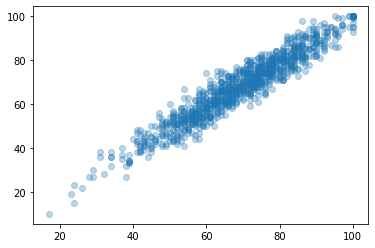

In [117]:
plt.scatter(x = df_mod.reading_score, y = df_mod.writing_score, alpha = 0.3);

In [105]:
df_mod.corr()

,math_score,reading_score,writing_score
math_score,1.000000,0.817580,0.802642
reading_score,0.817580,1.000000,0.954598
writing_score,0.802642,0.954598,1.000000
